## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "./Mouse_metadata.csv"
study_results = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# mouse_metadata_df.head()
# study_results_df.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
merge_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [9]:
#Count the number of mice

Mouse_ID_df = merge_df.loc[:, ["Mouse ID"]]

Mouse_count_original = len(merge_df["Mouse ID"].value_counts())

pd.DataFrame({"Number of Mice": [Mouse_count_original]})

,Number of Mice
0,249


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_df.loc[:,"Mouse ID"]

duplicate_ids = merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

duplicate_ids



array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df["Mouse ID"] == 'g989'


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df = merge_df[merge_df["Mouse ID"].isin(duplicate_ids) == False]

updated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.

updated_count_df = updated_df.loc[:, ["Mouse ID"]]

Mouse_count_updated = len(updated_count_df["Mouse ID"].value_counts())

pd.DataFrame({"Number of Mice": [Mouse_count_updated]})



,Number of Mice
0,248


## Summary Statistics

In [14]:
updated_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame(updated_df.groupby("Drug Regimen").count())
# summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.
summary_stats_df["Mean"] = updated_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_stats_df["Median"] = updated_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_stats_df["Variance"] = updated_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_stats_df["Standard Deviation"] = updated_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_stats_df["SEM"] = updated_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,181,181,181,181,181,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,148,148,148,148,148,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
grouped_df = updated_df.groupby("Drug Regimen")
grouped_df

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_df.agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

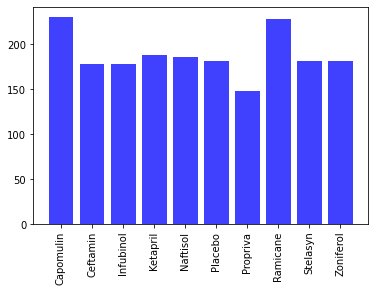

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#x axis
x_axis = np.arange(len(grouped_df["Drug Regimen"]))

#y axis
mouse_count = grouped_df["Mouse ID"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

#tick mark management
tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)
plt.show()

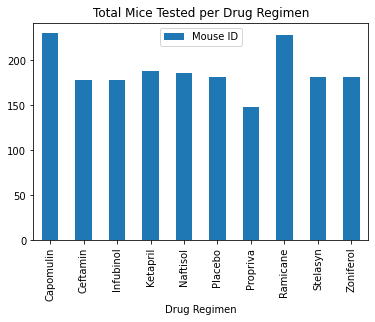

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PANDAS.
mouse_count_df.plot(kind="bar")
plt.title("Total Mice Tested per Drug Regimen")
plt.show()

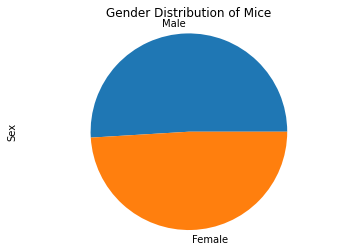

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = updated_df["Sex"].value_counts()
gender.plot(kind="pie", title=("Gender Distribution of Mice"))

plt.axis("equal")

plt.show()

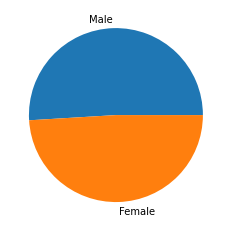

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender.values, labels=gender.index)

plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
updated_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

ID_grouped_df = updated_df.groupby("Mouse ID").max()

# Start by getting the last (greatest) timepoint for each mouse

ID_grouped_df = ID_grouped_df[["Timepoint"]]

ID_grouped_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(updated_df, ID_grouped_df, on=["Mouse ID", "Timepoint"], how="inner")

merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [89]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    tumor_volume = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(tumor_volume)
#     print(tumor_volume)
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = tumor_volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
      #print(iqr)
      
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume > up_bound) | (tumor_volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")
    


The outliers for Infubinol are 74    36.321346
Name: Tumor Volume (mm3), dtype: float64.


In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

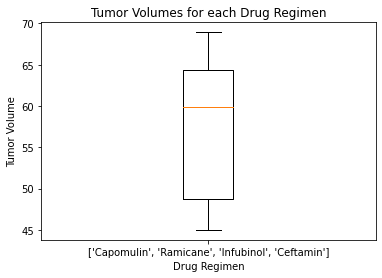

In [92]:
data_to_plot = tumor_volume
data_to_plot

plt.boxplot(data_to_plot, labels=[drug_list])
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

In [101]:
#create df for Capomulin mouse
Mouse_m601 = updated_df.loc[updated_df["Mouse ID"]=="m601"]
Mouse_m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


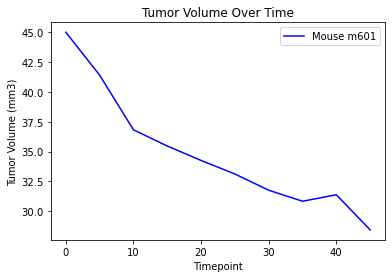

In [103]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x = Mouse_m601["Timepoint"]
y = Mouse_m601["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue",label="Mouse m601")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [106]:
#Create df with average weight and average tumor volume

#create capomulin df

Capomulin_df = updated_df.loc[updated_df["Drug Regimen"]=="Capomulin"]
# Capomulin_df

#group by Mouse ID

mouse_data = Capomulin_df.groupby("Mouse ID")

#variables to hold column data

mouseWg = mouse_data["Weight (g)"].mean()
mouseTV = mouse_data["Tumor Volume (mm3)"].mean()

#create new df

mouse_weight_df = pd.DataFrame({"Weight (g)": mouseWg,
                       "Tumor Volume (mm3)": mouseTV})
mouse_weight_df

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


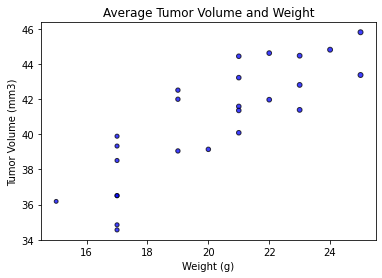

In [107]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#set x and y values
x_values = mouse_weight_df["Weight (g)"]
y_values = mouse_weight_df["Tumor Volume (mm3)"]

#create scatter plot

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)

plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
